<a href="https://colab.research.google.com/github/JulioCastillo1/TP1-Datos/blob/master/Treemap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
import plotly.express as px
!pip install squarify
import squarify
import seaborn

url='https://raw.githubusercontent.com/JulioCastillo1/TP1-Datos/master/loaded_locations.csv'
tweets = pd.read_csv(url)

tweets.dtypes

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Unnamed: 0      int64
id              int64
keyword        object
location       object
text           object
target          int64
geolocation    object
point          object
dtype: object

In [0]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5080 entries, 0 to 5079
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   5080 non-null   int64 
 1   id           5080 non-null   int64 
 2   keyword      5080 non-null   object
 3   location     5080 non-null   object
 4   text         5080 non-null   object
 5   target       5080 non-null   int64 
 6   geolocation  4083 non-null   object
 7   point        4083 non-null   object
dtypes: int64(3), object(5)
memory usage: 317.6+ KB


In [0]:
tweets['geolocation'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Birmingham, West Midlands Combined Authority, ...
1                                                     NaN
2                                                  Africa
3       Philadelphia, Philadelphia County, Pennsylvani...
4       London, Greater London, England, SW1A 2DX, Uni...
                              ...                        
5075                                                 تونس
5076                                                  NaN
5077    Vancouver, Metro Vancouver Regional District, ...
5078    London, Greater London, England, SW1A 2DX, Uni...
5079    Lincoln, Lincoln County, Washington, United St...
Name: geolocation, Length: 5080, dtype: object>

In [0]:
tweets.head

<bound method NDFrame.head of       Unnamed: 0  ...                            point
0             31  ...    (52.4796992, -1.9026911, 0.0)
1             32  ...                              NaN
2             33  ...    (11.5024338, 17.7578122, 0.0)
3             34  ...   (39.9527237, -75.1635262, 0.0)
4             35  ...    (51.5073219, -0.1276474, 0.0)
...          ...  ...                              ...
5075        7575  ...      (33.8439408, 9.400138, 0.0)
5076        7577  ...                              NaN
5077        7579  ...  (49.2608724, -123.1139529, 0.0)
5078        7580  ...    (51.5073219, -0.1276474, 0.0)
5079        7581  ...   (47.8299069, -118.414727, 0.0)

[5080 rows x 8 columns]>

In [0]:
tweets['geolocation']

0       Birmingham, West Midlands Combined Authority, ...
1                                                     NaN
2                                                  Africa
3       Philadelphia, Philadelphia County, Pennsylvani...
4       London, Greater London, England, SW1A 2DX, Uni...
                              ...                        
5075                                                 تونس
5076                                                  NaN
5077    Vancouver, Metro Vancouver Regional District, ...
5078    London, Greater London, England, SW1A 2DX, Uni...
5079    Lincoln, Lincoln County, Washington, United St...
Name: geolocation, Length: 5080, dtype: object

In [0]:
locaciones = tweets['geolocation'].str.split(', ').dropna()
locaciones

0       [Birmingham, West Midlands Combined Authority,...
2                                                [Africa]
3       [Philadelphia, Philadelphia County, Pennsylvan...
4       [London, Greater London, England, SW1A 2DX, Un...
5       [Pretoria, City of Tshwane Metropolitan Munici...
                              ...                        
5074    [Global, Barber Greene Road, Don Mills, Don Va...
5075                                               [تونس]
5077    [Vancouver, Metro Vancouver Regional District,...
5078    [London, Greater London, England, SW1A 2DX, Un...
5079    [Lincoln, Lincoln County, Washington, United S...
Name: geolocation, Length: 4083, dtype: object

In [0]:
tweets['paises']=locaciones.map(itemgetter(-1))
tweets

,Unnamed: 0,id,keyword,location,text,target,geolocation,point,paises
0,31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,"Birmingham, West Midlands Combined Authority, ...","(52.4796992, -1.9026911, 0.0)",United Kingdom
1,32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,NaN,NaN,NaN
2,33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,Africa,"(11.5024338, 17.7578122, 0.0)",Africa
3,34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,"Philadelphia, Philadelphia County, Pennsylvani...","(39.9527237, -75.1635262, 0.0)",United States of America
4,35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,"London, Greater London, England, SW1A 2DX, Uni...","(51.5073219, -0.1276474, 0.0)",United Kingdom
...,...,...,...,...,...,...,...,...,...
5075,7575,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0,تونس,"(33.8439408, 9.400138, 0.0)",تونس
5076,7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0,NaN,NaN,NaN
5077,7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0,"Vancouver, Metro Vancouver Regional District, ...","(49.2608724, -123.1139529, 0.0)",Canada
5078,7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0,"London, Greater London, England, SW1A 2DX, Uni...","(51.5073219, -0.1276474, 0.0)",United Kingdom


In [0]:
paises = tweets.groupby('paises').count()
paises['location'].idxmax()

'United States of America'

In [0]:
paises['location'].max()

1914

In [0]:
paises = paises.sort_values(by=['location'], ascending=False)
paises

,Unnamed: 0,id,keyword,location,text,target,geolocation,point
paises,,,,,,,,
United States of America,1914,1914,1914,1914,1914,1914,1914,1914
United Kingdom,465,465,465,465,465,465,465,465
Canada,262,262,262,262,262,262,262,262
United States,171,171,171,171,171,171,171,171
Australia,121,121,121,121,121,121,121,121
...,...,...,...,...,...,...,...,...
Cameroun,1,1,1,1,1,1,1,1
Бългaрия,1,1,1,1,1,1,1,1
България,1,1,1,1,1,1,1,1


In [0]:
TopCountries=paises.loc[:,['location']].head(8)
TopCountries

,location
paises,
United States of America,1914
United Kingdom,465
Canada,262
United States,171
Australia,121
India,112
Nigeria,72
France,47


In [0]:
TopCountries.loc['United States of America',['location']]=TopCountries.loc['United States of America',['location']]\
                                                          +TopCountries.loc['United States',['location']]
TopCountries = TopCountries.drop('United States')
TopCountries

,location
paises,
United States of America,2085
United Kingdom,465
Canada,262
Australia,121
India,112
Nigeria,72
France,47


In [0]:
TopCountries.reset_index(inplace=True)


In [0]:
TopCountries['paises'].astype('string')

0    United States of America
1              United Kingdom
2                      Canada
3                   Australia
4                       India
5                     Nigeria
6                      France
Name: paises, dtype: string

In [0]:
TopCountries['location']


0    2085
1     465
2     262
3     121
4     112
5      72
6      47
Name: location, dtype: int64

In [0]:
labels=TopCountries['paises'].astype('string')
proporciones=TopCountries['location']/50
labels

0    United States of America
1              United Kingdom
2                      Canada
3                   Australia
4                       India
5                     Nigeria
6                      France
Name: paises, dtype: string

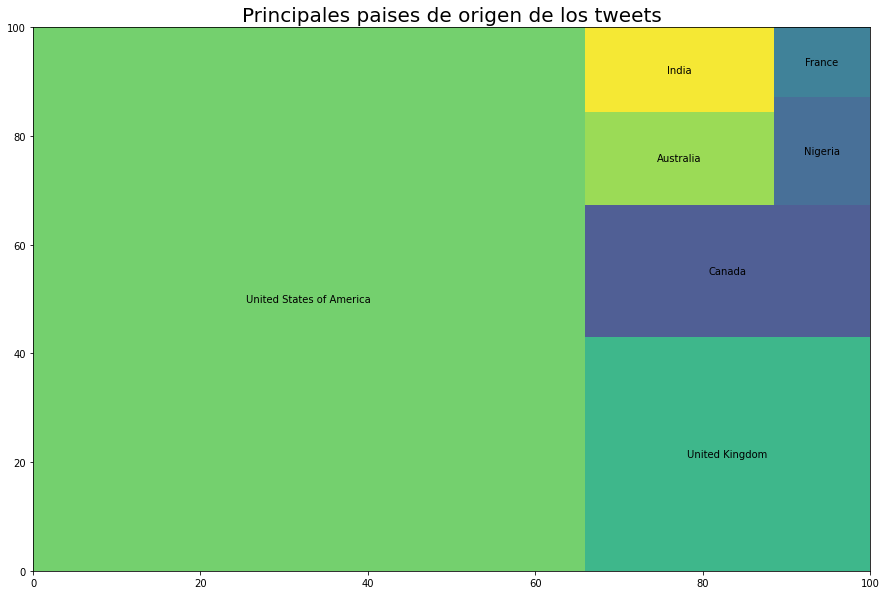

In [37]:
plt.figure(figsize=(15,10))
squarify.plot(label=labels,sizes=proporciones, alpha=.9)
plt.title("Principales paises de origen de los tweets", fontsize=20)
plt.show()